<a href="https://colab.research.google.com/github/lmendezayl/uba-ldd-ic/blob/main/guias/soluciones/practica10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 10: Descenso por gradiente y Redes Neuronales



Para realizar esta guía de ejercicios, descargar de la página de la materia el archivo `tf_regressor.py` para poder correr el siguiente comando

In [44]:
import requests
import os

url_tf = "https://raw.githubusercontent.com/lmendezayl/uba-ldd-ic/refs/heads/main/datasets/tf_regressor.py"
response = requests.get(url_tf)
tf_regressor = os.path.basename(url_tf)

with open(tf_regressor, "wb") as file:
    file.write(response.content)

url = 'https://raw.githubusercontent.com/lmendezayl/uba-ldd-ic/refs/heads/main/datasets/'

In [45]:
from tf_regressor import Regressor, train_test_split_scale_center
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import tensorflow as tf


## Ejercicio 1.



En este ejercicio utilizaremos el dataset `casos_coronavirus`.



### (a)
Cargar el dataset y añadirle la columna `dias_transcurridos` con el indice de cada observación


In [46]:
corona = pd.read_csv(url + 'casos_coronavirus.csv')
corona['dias_transcurridos'] = corona.index


### (b)

Plotear `dias_transcurridos` vs. `confirmados_Nuevos`


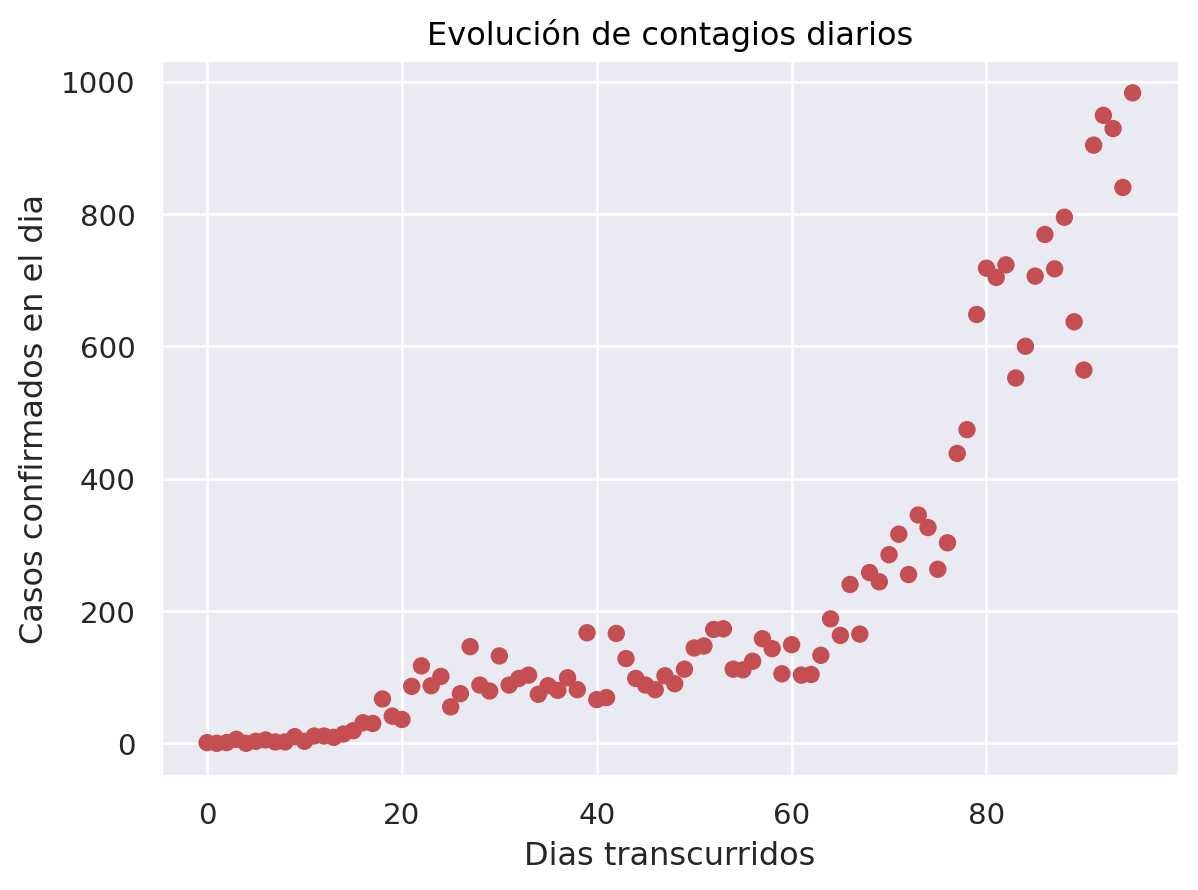

In [47]:
(
    so.Plot(corona.dias_transcurridos, corona.confirmados_Nuevos)
    .add(so.Dot(color='r'))
    .label(x='Dias transcurridos',
           y='Casos confirmados en el dia',
           title='Evolución de contagios diarios')
)


### (c)



Queremos armar un modelo de regresión que permita explicar la evolución de casos de coronavirus ($Y$) en función de los días transcurridos ($X$). Para esto se proponen los siguientes modelos:

1. $Y = b + w_0 X + w_1 X^2$

2. $ Y = b + w_0 X^{w_1}$

3. $Y = b + w e^X$

4. $Y = b + w_0 e^{w_1 X}$

Dividir el conjunto de datos en entrenamiento y testeo y decidir qué modelo resulta más adecuado. Utilizar `scikit-learn` para los modelos lineales y Regressor para los no lineales. En este último caso, se pueden usar de guía los modelos lineales para establecer valores iniciales de los pesos. Probar con distintas cantidades de épocas y valores iniciales para los pesos y el bias.

**Obs**: para el modelo 4 escribir `f` utilizando `np.e**(w[1]*x)` para $e^{w_1x}$


In [48]:
y = corona['confirmados_Nuevos']
X = corona['dias_transcurridos']

X_train, X_test, y_train, y_test = train_test_split_scale_center(X, y, transform_y=True, center=False, test_size=0.2, random_state=42)

# Primer Modelo: Y = b + w_0 X + w_1 X^2
f1 = lambda x, w, b: b + tf.cast(w[0], x.dtype)*x + tf.cast(w[1], x.dtype)*(x**2) # estamos usando las variables de lambda

model_1 = Regressor()  # iniciamos el modelo
model_1.add_f(f1, dim_w=2, random_state=42, opt='gd') # definimos arquitecutra de red neuronal
model_1.fit_(X_train, y_train, epochs=500, validation_split=0.2, verbose=0, learning_rate=0.05)
print(model_1.evaluate(X_test.to_numpy(), y_test.to_numpy(), return_dict=True, verbose=0, batch_size=len(y_test)))

{'loss': 0.012679673731327057}


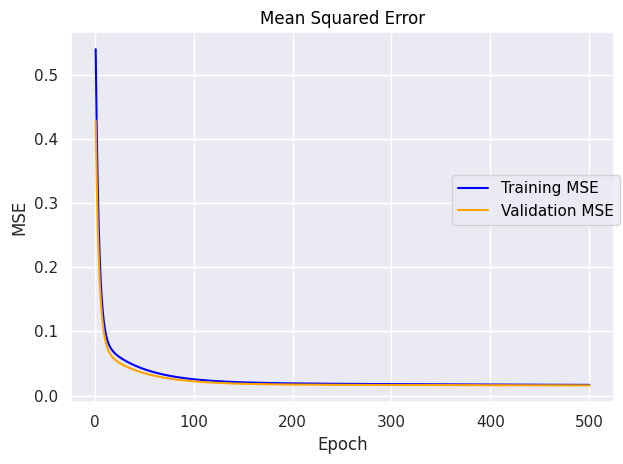

In [49]:
model_1.plot_loss() # la solucion era castear w de np.array a tensor!!!!

Esta overfitteando o le mando mas????

edit 500 epocas : .___.



In [57]:
# Segundo Modelo: Y = b + w_0 X^{w_1}
X_train, X_test, y_train, y_test = train_test_split_scale_center(X, y, transform_y=True, center=False, test_size=0.2, random_state=42)
f2 = lambda x, w, b: b + tf.cast(w[0], x.dtype)*x**tf.cast(w[1], x.dtype)
model_2 = Regressor()
model_2.add_f(f2, w0=0, b0=0, random_state=42, opt='gd')
model_2.fit_(X_train, y_train, epochs=100, validation_split=0.2, verbose=0, learning_rate=0.05)
print(model_2.evaluate(X_test.to_numpy(), y_test.to_numpy(), return_dict=True, verbose=0, batch_size=len(y_test)))

ValueError: Exception encountered when calling Regressor.call().

[1mslice index 1 of dimension 0 out of bounds. for '{{node regressor_13_1/strided_slice_1}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](regressor_13_1/ReadVariableOp_1, regressor_13_1/strided_slice_1/stack, regressor_13_1/strided_slice_1/stack_1, regressor_13_1/strided_slice_1/stack_2)' with input shapes: [1], [1], [1], [1] and with computed input tensors: input[1] = <1>, input[2] = <2>, input[3] = <1>.[0m

Arguments received by Regressor.call():
  • x=tf.Tensor(shape=(76,), dtype=float32)

no se entiende una verga el error, m voy a la mierda

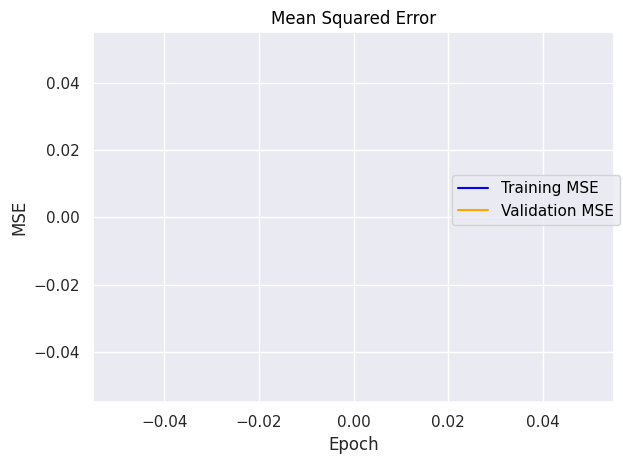

In [56]:
model_2.plot_loss()

In [51]:
# Tercer Modelo: Y = b + w e^X
f3 = lambda x, w, b: b + tf.cast(w[0], x.dtype)*x + tf.cast(w[1], x.dtype)*(x**2)
model_1 = Regressor()
model_1.add_f(f1, dim_w=2, random_state=21, opt='gd')
model_1.fit_(X_train, y_train, epochs=100, validation_split=0.2, verbose=0, learning_rate=0.05)
print(model_1.evaluate(X_test.to_numpy(), y_test.to_numpy(), return_dict=True, verbose=0, batch_size=len(y_test)))

{'loss': 0.021052267402410507}


In [52]:
# Cuarto Modelo: Y = b + w_0 e^{w_1 X}
f4 = lambda x, w, b: b + tf.cast(w[0], x.dtype)*x + tf.cast(w[1], x.dtype)*(x**2)
model_1 = Regressor()
model_1.add_f(f1, dim_w=2, random_state=21, opt='gd')
model_1.fit_(X_train, y_train, epochs=100, validation_split=0.2, verbose=0, learning_rate=0.05)
print(model_1.evaluate(X_test.to_numpy(), y_test.to_numpy(), return_dict=True, verbose=0, batch_size=len(y_test)))

{'loss': 0.021052267402410507}



## Ejercicio 2.



En este ejercicio trabajaremos con el dataset titanic de seaborn


In [53]:
titanic = sns. load_dataset ('titanic')


### (a) Limpiando el dataset




1. contar cuantos NaN tiene cada columna, y en base a eso decidir qué columna del dataset descartar antes de ejecutar `.dropna()`
2. graficar un boxplot de fare (precio del boleto), ¿qué se observa?
3. explorar el método de pandas `quantile` para calcular el cuantil 0.99 de la columna `fare` y utilizarlo para eliminar las observaciones con outliers en esa columna.



### (b)
Realizar regresión logística para predecir la variable binaria de supervivencia (`survived`) a partir del precio del boleto (`fare`). ¿Qué porcentaje de casos clasifica correctamente?



### (c)
Repetir el item anterior, considerando la interacción de la suma de `fare` y age con `adult_male`. ¿Cuánto mejoró la precisión de la clasificación? ¿Qué se puede concluir a partir de la mejora en la precisión y del análisis de los pesos que el modelo otorga a cada variable?



### (d)
Proponer un método que permita obtener una clasificación más precisa mediante regresión logística. Las demás columnas del DataFrame son:
 - `pcclass` : clase en la que viajaba
 - `sibsp` : si viajaba con hermanos/as o cónyugues
 - `parch` : cantidad de hijes o padres con los que viajaba
 - `embarked` : donde se embarcó
 - `class` : nombre de la clase en la que viajaba (dato de pcclass en string)
 - `embark_town` : nombre del lugar donde embarcó
 - `alive` : si sobrevivió (mismo valor que survived pero booleano, por lo tanto no usarpara predecir)
 - `alone` : si viajaba solo/a (es True si *sibsp* = 0 y *parch* = 0)



## Ejercicio 3.



Utilizando el dataset `diabetes.csv`, se quiere desarrollar un modelo para predecir si una persona tiene o no diabetes en base a las características descriptas en el resto de las columnas.



### (a)
Entrenar un perceptrón simple que permita categorizar a una persona como diabética o no diabética utilizando la sigmoidea como función de activación. ¿Cuántos falsos negativos hay? ¿Cómo se intepretan los pesos de la red entrenada?



### (b)
Diseñar una red multicapa para la clasificación, utilizando la sigmoidea como función de activación. ¿Cómo se desempeña este modelo con respecto al anterior?



## Ejercicio 4.



Probar que un perceptrón simple con la identidad como función de activación es equivalente a un modelo de Regresión Lineal.
